<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab4/Lab4_1_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 4 - PART 1 Classification with KNN, Decision Tree and Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.options.display.float_format = '{:.3f}'.format

#### **Read csv file**
Select only `['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [ ]:
### START CODE HERE ###
df = pd.read_csv("Coffee-modified.csv")
selecting = ['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor',
             'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
df = df.loc[:,selecting]
### END CODE HERE ###
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1311 non-null   float64
 1   Species               1311 non-null   object 
 2   Country.of.Origin     1310 non-null   object 
 3   Processing.Method     1159 non-null   object 
 4   Aroma                 1311 non-null   float64
 5   Flavor                1311 non-null   float64
 6   Aftertaste            1311 non-null   float64
 7   Acidity               1311 non-null   float64
 8   Body                  1311 non-null   float64
 9   Balance               1311 non-null   float64
 10  Uniformity            1311 non-null   float64
 11  Moisture              1311 non-null   float64
 12  altitude_mean_meters  1082 non-null   float64
dtypes: float64(10), object(3)
memory usage: 133.3+ KB


**Drop NA**


In [ ]:
### START CODE HERE ###
df = df.dropna(how='any')
### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


In [ ]:
df.describe()

,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [ ]:
### START CODE HERE ###
cols = ['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
Y = df.loc[:, ['Total.Cup.Points']]
X = df.loc[:, cols]
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [ ]:
print(X.columns)
print(Y.columns)

Index(['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture',
       'altitude_mean_meters'],
      dtype='object')
Index(['Total.Cup.Points'], dtype='object')


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>
<br>

|       |   Bean_grade |
|-------|--------------|
| count | 1003.000000  |
| mean  | 1.360917     |
| std   | 0.663677     |
| min   | 1.000000     |
| 25%   | 1.000000     |
| 50%   | 1.000000     |
| 75%   | 2.000000     |
| max   | 3.000000     |

</details>

In [ ]:
### START CODE HERE ###
percentiles = df['Total.Cup.Points'].quantile([.75, .9]).tolist()
def labeling_grade(row):
  if row['Total.Cup.Points'] < percentiles[0]:
    return 1
  elif row['Total.Cup.Points'] < percentiles[1]:
    return 2
  else:
    return 3
df['Bean_grade'] = df.apply(labeling_grade, axis=1)
df = df.reindex(columns=(['Bean_grade'] + selecting))
### END CODE HERE ###
df

<ipython-input-11-334ec2539e2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bean_grade'] = df.apply(labeling_grade, axis=1)


,Bean_grade,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,3,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
3,3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,3,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
9,3,88.250,Arabica,Ethiopia,Natural / Dry,8.080,8.580,8.500,8.500,7.670,8.420,10.000,0.100,1822.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1,69.170,Arabica,Honduras,Washed / Wet,7.000,6.330,6.170,6.500,6.670,6.170,8.000,0.100,1450.000
1306,1,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,1,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,1,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000


**Plot Bar graph that show count of each `Bean_grade`.**

Text(0, 0.5, 'Count')

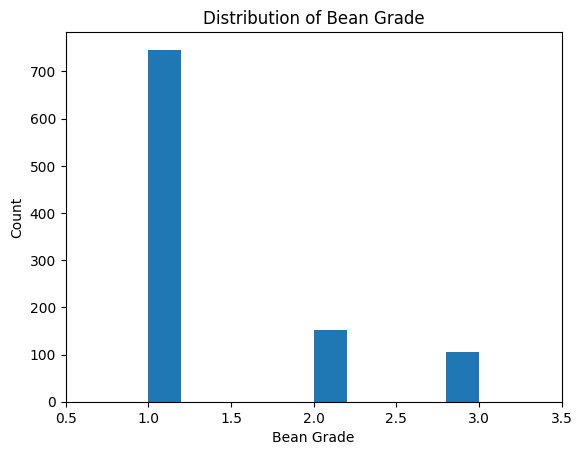

In [ ]:
### START CODE HERE ###
plt.hist(df['Bean_grade'])
plt.xlim(0.5,3.5)
plt.title('Distribution of Bean Grade')
plt.xlabel('Bean Grade')
plt.ylabel('Count')
### END CODE HERE ###

**Standardize X's numeric data**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

|       |   Aroma |   Flavor |   Aftertaste |   Acidity |   Body |   Balance |   Uniformity |   Moisture |   altitude_mean_meters |
|-------|---------|----------|--------------|-----------|--------|-----------|--------------|------------|------------------------|
| count | 1003.000| 1003.000 | 1003.000     | 1003.000  | 1003.000| 1003.000  | 1003.000     | 1003.000   | 1003.000               |
| mean  | -0.000  | 0.000    | -0.000       | -0.000    | -0.000 | -0.000    | -0.000       | -0.000     | -0.000                 |
| std   | 1.000   | 1.000    | 1.000        | 1.000     | 1.000  | 1.000     | 1.000        | 1.000      | 1.000                  |
| min   | -8.258  | -4.143   | -3.655       | -7.398    | -4.306 | -4.167    | -8.694       | -2.186     | -0.199                 |
| 25%   | -0.490  | -0.567   | -0.648       | -0.638    | -0.639 | -0.497    | 0.292        | 0.115      | -0.079                 |
| 50%   | 0.042   | -0.042   | 0.103        | -0.085    | -0.016 | 0.002     | 0.292        | 0.346      | -0.056                 |
| 75%   | 0.606   | 0.482    | 0.584        | 0.467     | 0.608  | 0.501     | 0.292        | 0.576      | -0.024                 |
| max   | 3.926   | 4.058    | 3.862        | 3.978     | 3.651  | 3.173     | 0.292        | 1.727      | 20.679                 |

</details>



In [ ]:
### START CODE HERE ###
numeric_cols = X.select_dtypes(include=[np.number]).columns
sc = preprocessing.StandardScaler()
X[numeric_cols] = sc.fit_transform(X[numeric_cols])
X.describe()
### END CODE HERE ###

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-8.258,-4.143,-3.655,-7.398,-4.306,-4.167,-8.694,-2.186,-0.199
25%,-0.490,-0.567,-0.648,-0.638,-0.639,-0.497,0.292,0.115,-0.079
50%,0.042,-0.042,0.103,-0.085,-0.016,0.002,0.292,0.346,-0.056
75%,0.606,0.482,0.584,0.467,0.608,0.501,0.292,0.576,-0.024
max,3.926,4.058,3.862,3.978,3.651,3.173,0.292,1.727,20.679


**Drop the columns that have correlation more than 0.8.**

In [ ]:
### START CODE HERE ###
correlation_matrix = X.corr()
# Find columns with correlation greater than 0.8
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)
X_filtered = X.drop(columns=highly_correlated_cols)
dropped_columns = set(X.columns) - set(X_filtered.columns)
print("Dropped Columns:", dropped_columns)
### END CODE HERE ###

Dropped Columns: {'Aftertaste'}


<ipython-input-15-5591d5a092b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
'Moisture', 'altitude_mean_meters', 'Country.of.Origin_Burundi',
'Country.of.Origin_China', 'Country.of.Origin_Colombia',
'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote d?Ivoire',
'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
'Country.of.Origin_Indonesia', 'Country.of.Origin_Japan',
'Country.of.Origin_Kenya', 'Country.of.Origin_Laos',
'Country.of.Origin_Malawi', 'Country.of.Origin_Mexico',
'Country.of.Origin_Myanmar', 'Country.of.Origin_Nicaragua',
'Country.of.Origin_Panama', 'Country.of.Origin_Papua New Guinea',
'Country.of.Origin_Peru', 'Country.of.Origin_Philippines',
'Country.of.Origin_Rwanda', 'Country.of.Origin_Taiwan',
'Country.of.Origin_Tanzania, United Republic Of',
'Country.of.Origin_Thailand', 'Country.of.Origin_Uganda',
'Country.of.Origin_United States',
'Country.of.Origin_United States (Puerto Rico)',
'Country.of.Origin_Vietnam', 'Country.of.Origin_Zambia',
'Processing.Method_Other', 'Processing.Method_Pulped natural / honey',
'Processing.Method_Semi-washed / Semi-pulped',
'Processing.Method_Washed / Wet']
```

</details>

In [ ]:
### START CODE HERE ###
non_num_cols = X.select_dtypes(exclude=[np.number]).columns
X = pd.get_dummies(X, columns=non_num_cols)
### END CODE HERE ###
X.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Moisture', 'altitude_mean_meters', 'Species_Arabica',
       'Country.of.Origin_Brazil', 'Country.of.Origin_Burundi',
       'Country.of.Origin_China', 'Country.of.Origin_Colombia',
       'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote d?Ivoire',
       'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
       'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
       'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
       'Country.of.Origin_Indonesia', 'Country.of.Origin_Japan',
       'Country.of.Origin_Kenya', 'Country.of.Origin_Laos',
       'Country.of.Origin_Malawi', 'Country.of.Origin_Mexico',
       'Country.of.Origin_Myanmar', 'Country.of.Origin_Nicaragua',
       'Country.of.Origin_Panama', 'Country.of.Origin_Papua New Guinea',
       'Country.of.Origin_Peru', 'Country.of.Origin_Philippines',
       'Country.of.Origin_Rwanda', 'Country.of.Origin_Tai

In [ ]:
### START CODE HERE ###
Y = df.loc[:, ['Bean_grade']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
### START CODE HERE ###

### **KNN Model Training and Testing**

- Select three values for `'n_neighbors'`.
- Train KNN models using each of the selected `'n_neighbors'` values.
- Plot a bar graph to display the accuracy score for each `'n_neighbors'` value."
- Print `confusion_matrix` and `classification_report` of the model that have the best `accuracy_score`
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `KNeighborsClassifier()`

</details>
<br>
<details>

```
confusion_matrix :
 [[215   8   1]
 [ 10  36   0]
 [  0  12  19]]
classification_report :
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       224
           2       0.64      0.78      0.71        46
           3       0.95      0.61      0.75        31

    accuracy                           0.90       301
   macro avg       0.85      0.79      0.80       301
weighted avg       0.91      0.90      0.90       301
```

</details>

In [ ]:
### START CODE HERE ###
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
### END CODE HERE ###

In [ ]:
### START CODE HERE ###
# k = [1,3,5,7,9,11,13,15,17,19,25,35]
from sklearn.model_selection import GridSearchCV
knn_parameters_grid = {'n_neighbors': [1,5,13,17,35]}
grid_search_knn = GridSearchCV(knn_model, knn_parameters_grid, cv=3)
grid_search_knn.fit(X_train, y_train)
print("KNN best params:", grid_search_knn.best_params_)
print("KNN best score:", grid_search_knn.best_score_)
print("KNN score mean:", grid_search_knn.cv_results_['mean_test_score'].mean())
print("KNN score std:", grid_search_knn.cv_results_['mean_test_score'].std())
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNN best params: {'n_neighbors': 5}
KNN best score: 0.8945868945868947
KNN score mean: 0.8777777777777777
KNN score std: 0.010128996486969357


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
### START CODE HERE ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
knn_best_params = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**knn_best_params)
knn_best.fit(X_train, y_train)
knn_preds = knn_best.predict(X_test)
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))
print("Accuracy:", metrics.accuracy_score(y_test, knn_preds))
### END CODE HERE ###

[[213   4   3]
 [ 18  27   4]
 [  0   6  26]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94       220
           2       0.73      0.55      0.63        49
           3       0.79      0.81      0.80        32

    accuracy                           0.88       301
   macro avg       0.81      0.78      0.79       301
weighted avg       0.88      0.88      0.88       301

Accuracy: 0.8837209302325582


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

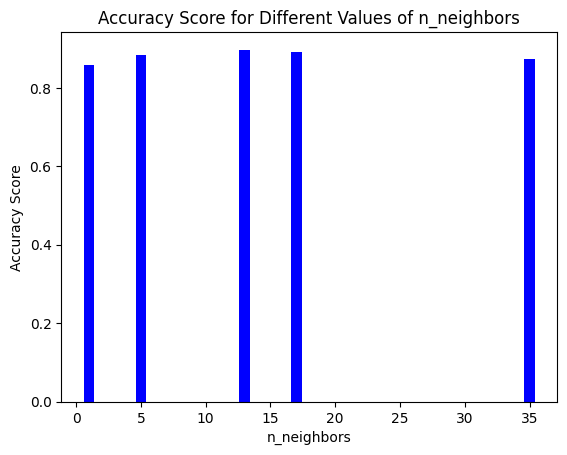

In [ ]:
n_neighbors_values = [1,5,13,17,35]
accuracy_scores = []
for n in n_neighbors_values:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

plt.bar(n_neighbors_values, accuracy_scores, color='blue')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of n_neighbors')
plt.show()

### **Decision Tree Model Training and Testing**
Parameters
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6,None]`

Fit models with all this parameters.<br>
Then, print accuracy score of all parameter sets.<br>
Next, <font color="orange">plot the Tree, print confusion matrix and classification report</font> of best accuracy score for each criteion `entropy` and `gini`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `DecisionTreeClassifier()`

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
Accuracy is 0.8471760797342193 for criterion = entropy and max_depth = 4
...
Accuracy is 0.8504983388704319 for criterion = entropy and max_depth = None
Accuracy is 0.8504983388704319 for criterion = gini and max_depth = 4
...
Accuracy is 0.8338870431893688 for criterion = gini and max_depth = None
```


```Entropy Confusion Matrix:
 [[205  17   2]
 [ 10  30   6]
 [  1   5  25]]
Entropy Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.92      0.93       224
           2       0.58      0.65      0.61        46
           3       0.76      0.81      0.78        31

    accuracy                           0.86       301
   macro avg       0.76      0.79      0.78       301
weighted avg       0.87      0.86      0.87       301

Gini Confusion Matrix:
 [[212  11   1]
 [ 18  27   1]
 [  2  12  17]]
Gini Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       224
           2       0.54      0.59      0.56        46
           3       0.89      0.55      0.68        31

    accuracy                           0.85       301
   macro avg       0.78      0.69      0.72       301
weighted avg       0.85      0.85      0.85       301
```
</details>

In [ ]:
### START CODE HERE ###
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree_model = DecisionTreeClassifier()
### END CODE HERE ###

In [ ]:
### START CODE HERE ###
# ASM_func = ['entropy', 'gini'], max_depth = [3,4,5,6,10,None]
from sklearn.model_selection import GridSearchCV
dtree_parameters_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [3,10,None]}
grid_search_dtree = GridSearchCV(dtree_model, dtree_parameters_grid, cv=3)
grid_search_dtree.fit(X_train, y_train)
print("dtree best params:", grid_search_dtree.best_params_)
print("dtree best score:", grid_search_dtree.best_score_)
print("dtree score mean:", grid_search_dtree.cv_results_['mean_test_score'].mean())
print("dtree score std:", grid_search_dtree.cv_results_['mean_test_score'].std())
### END CODE HERE ###

dtree best params: {'criterion': 'entropy', 'max_depth': 10}
dtree best score: 0.8760683760683761
dtree score mean: 0.8627730294396961
dtree score std: 0.011708288704594493


In [ ]:
### START CODE HERE ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
dtree_best_params = grid_search_dtree.best_params_
dtree_best = DecisionTreeClassifier(**dtree_best_params)
dtree_best.fit(X_train, y_train)
dtree_preds = dtree_best.predict(X_test)
print(confusion_matrix(y_test, dtree_preds))
print(classification_report(y_test, dtree_preds))
print("Accuracy:", metrics.accuracy_score(y_test, dtree_preds))
### END CODE HERE ###

[[203  15   2]
 [ 13  29   7]
 [  0   6  26]]
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       220
           2       0.58      0.59      0.59        49
           3       0.74      0.81      0.78        32

    accuracy                           0.86       301
   macro avg       0.75      0.78      0.76       301
weighted avg       0.86      0.86      0.86       301

Accuracy: 0.8571428571428571


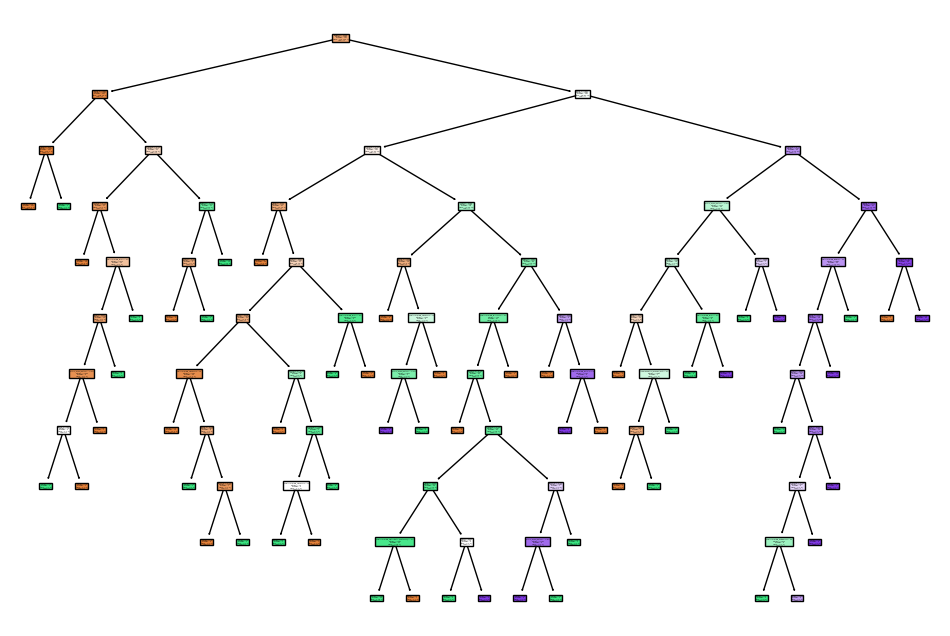

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dtree_best, filled=True, feature_names=X_train.columns, class_names=y_train.columns[0])
plt.show()

### **Random Forest Model Training and Testing**
Parameters
- criterion = `['entropy', 'gini']`
- n_estimators = `[10,100]`

Fit models with all this parameters.<br>
Then, print accuracy score of all parameter sets.<br>
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `RandomForestClassifier()`

</details>
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Accuracy is 0.8803986710963455 for criterion = entropy and n_estimators = 10
...
```

</details>

In [ ]:
### START CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
rforest_model = RandomForestClassifier()
### END CODE HERE ###

In [ ]:
### START CODE HERE ###
# ASM_func = ['entropy', 'gini'], n_estimators = [10,100]
from sklearn.model_selection import GridSearchCV
rforest_parameters_grid = {'criterion': ['entropy', 'gini'], 'n_estimators': [10,100]}
grid_search_rforest = GridSearchCV(rforest_model, rforest_parameters_grid, cv=3)
grid_search_rforest.fit(X_train, y_train)
print("rforest best params:", grid_search_rforest.best_params_)
print("rforest best score:", grid_search_rforest.best_score_)
print("rforest score mean:", grid_search_rforest.cv_results_['mean_test_score'].mean())
print("rforest score std:", grid_search_rforest.cv_results_['mean_test_score'].std())
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

rforest best params: {'criterion': 'gini', 'n_estimators': 100}
rforest best score: 0.905982905982906
rforest score mean: 0.89494301994302
rforest score std: 0.010290728829629569


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**Print confusion matrix and classification report of best accuracy score.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
confusion_matrix :
 [[219   4   1]
 [ 13  31   2]
 [  0  10  21]]
classification_report :
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       224
           2       0.69      0.67      0.68        46
           3       0.88      0.68      0.76        31

    accuracy                           0.90       301
   macro avg       0.84      0.78      0.80       301
weighted avg       0.90      0.90      0.90       301
```

</details>

In [ ]:
### START CODE HERE ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
rforest_best_params = grid_search_rforest.best_params_
rforest_best = RandomForestClassifier(**rforest_best_params)
rforest_best.fit(X_train, y_train)
rforest_preds = rforest_best.predict(X_test)
print(confusion_matrix(y_test, rforest_preds))
print(classification_report(y_test, rforest_preds))
print("Accuracy:", metrics.accuracy_score(y_test, rforest_preds))
### END CODE HERE ###

<ipython-input-42-89967a07b4a0>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_best.fit(X_train, y_train)


[[214   3   3]
 [ 16  30   3]
 [  0   7  25]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       220
           2       0.75      0.61      0.67        49
           3       0.81      0.78      0.79        32

    accuracy                           0.89       301
   macro avg       0.83      0.79      0.81       301
weighted avg       0.89      0.89      0.89       301

Accuracy: 0.893687707641196


**Plot bar graph of feature_importance of best models.**

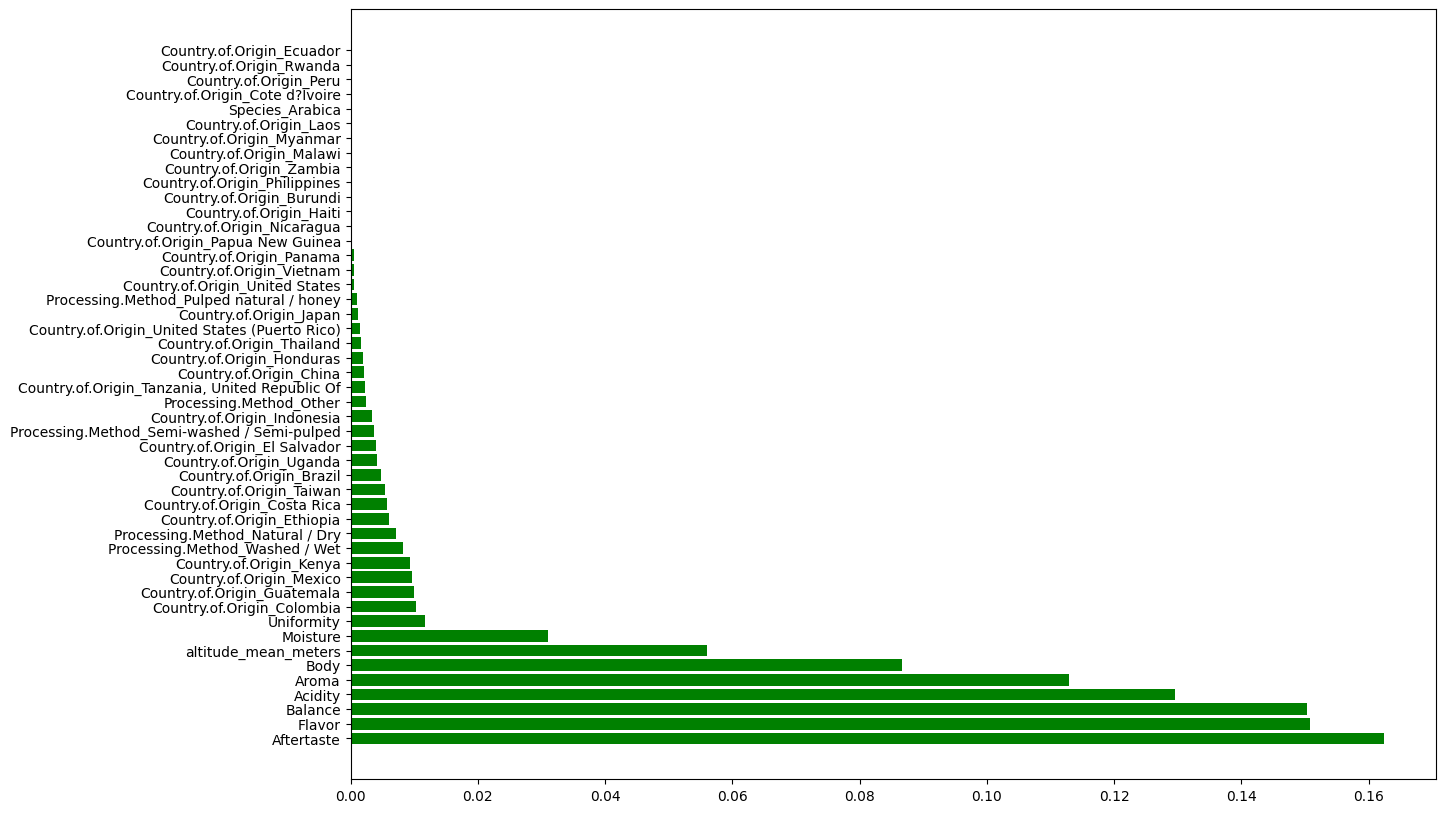

In [ ]:
### START CODE HERE ###
feature_importances = rforest_best.feature_importances_
feature_names = X.columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(14, 10))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, color='green')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.show()
### END CODE HERE ###

**Plot tree of all forest**<br>
NOTE: Please use high DPI for easier observation of the forest.

<ipython-input-50-44750735fab7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_model.fit(X_train, y_train)
<ipython-input-50-44750735fab7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_model.fit(X_train, y_train)
<ipython-input-50-44750735fab7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_model.fit(X_train, y_train)
<ipython-input-50-44750735fab7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_model.fit(X_train, y_train)


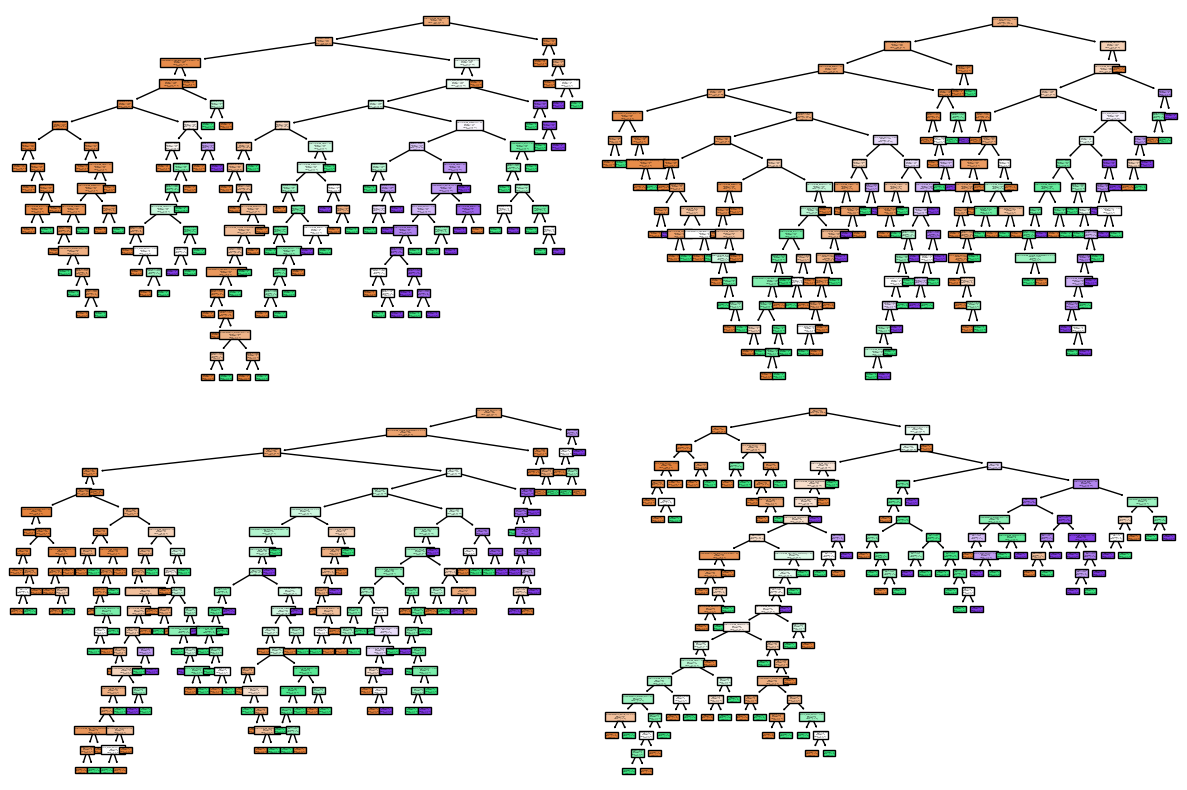

In [ ]:
### START CODE HERE ###
from itertools import product
rforest_parameters = {'criterion': ['entropy', 'gini'], 'n_estimators': [10, 100]}
fig, axes = plt.subplots(nrows=len(rforest_parameters['criterion']), ncols=len(rforest_parameters['n_estimators']), figsize=(12, 8))
for i, (criterion, n_estimators) in enumerate(product(rforest_parameters['criterion'], rforest_parameters['n_estimators'])):
    rforest_model = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators)
    rforest_model.fit(X_train, y_train)
    for estimator in rforest_model.estimators_:
        plot_tree(estimator, filled=True, feature_names=X_train.columns, class_names=y_train.columns[0], ax=axes[i//len(rforest_parameters['n_estimators']), i%len(rforest_parameters['n_estimators'])])
plt.tight_layout()
plt.show()
### END CODE HERE ###

### **MLP Training and Testing**
Parameters
 - hidden_layer_sizes = `(10,10,)`

Fit models with this parameters.<br>
Then, print accuracy score, confusion matrix and classification report.<br>
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `MLPClassifier()`

</details>
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Accuracy is 0.9036544850498339
Confusion Matrix:
 [[211  13   0]
 [  6  37   3]
 [  0   7  24]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.96       224
           2       0.65      0.80      0.72        46
           3       0.89      0.77      0.83        31

    accuracy                           0.90       301
   macro avg       0.84      0.84      0.83       301
weighted avg       0.91      0.90      0.91       301
...
```
</details>

In [ ]:
### START CODE HERE ###
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10,10,))
mlp_model.fit(X_train, y_train)
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10))

In [ ]:
### START CODE HERE ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
mlp_preds = mlp_model.predict(X_test)
print(confusion_matrix(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))
print("Accuracy:", metrics.accuracy_score(y_test, mlp_preds))
### END CODE HERE ###

[[214   4   2]
 [  8  33   8]
 [  0   5  27]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       220
           2       0.79      0.67      0.73        49
           3       0.73      0.84      0.78        32

    accuracy                           0.91       301
   macro avg       0.83      0.83      0.83       301
weighted avg       0.91      0.91      0.91       301

Accuracy: 0.9102990033222591


### **Hyperparameter Tuning (GridsearchCV)**
Search space for KNN
- n_neighhbors = `[1,3,5,7,9,11,13,15,17,19,25,35,45]`

Search space for Decision Tree
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6]`
- max_features = `['sqrt', 'log2',None]`
- min_samples_leaf = `[1,2,4]`

Search space for Random forest
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6]`
- max_features = `['sqrt', 'log2',None]`
- min_samples_leaf = `[1,2,4]`
- n_estimators = `[10,30,50,100]`

Search space for MLP
- hidden_layer_sizes = `[(2,2,), (20,20,), (50,50,)]`
- n_iter = `[100,200,300]`

Then run grid search.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`

</details>
<br>


In [ ]:
### START CODE HERE ###
# KNN
knn_model = KNeighborsClassifier()
knn_parameters_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,25,35,45]}
grid_search_knn = GridSearchCV(knn_model, knn_parameters_grid, cv=3)
grid_search_knn.fit(X_train, y_train)

# Decision Tree
dtree_model = DecisionTreeClassifier()
dtree_parameters_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [4,5,6], 'max_features': ['sqrt', 'log2',None], 'min_samples_leaf': [1,2,4]}
grid_search_dtree = GridSearchCV(dtree_model, dtree_parameters_grid, cv=3)
grid_search_dtree.fit(X_train, y_train)

# Random Forest
rforest_model = RandomForestClassifier()
rforest_parameters_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [4,5,6], 'max_features': ['sqrt', 'log2',None], 'min_samples_leaf': [1,2,4], 'n_estimators': [10,30,50,100]}
grid_search_rforest = GridSearchCV(rforest_model, rforest_parameters_grid, cv=3)
grid_search_rforest.fit(X_train, y_train)

# MLP
mlp_model = MLPClassifier()
mlp_parameters_grid = {'hidden_layer_sizes': [(2,2,), (20,20,), (50,50,)], 'max_iter': [100,200,300]}
grid_search_mlp = GridSearchCV(mlp_model, mlp_parameters_grid, cv=3)
grid_search_mlp.fit(X_train, y_train)

print("----------------------------KNN-------------------------------")
print("KNN best params:", grid_search_knn.best_params_)
print("KNN best score:", grid_search_knn.best_score_)
print("KNN score mean:", grid_search_knn.cv_results_['mean_test_score'].mean())
print("KNN score std:", grid_search_knn.cv_results_['mean_test_score'].std())
print("--------------------------------------------------------------")
print("----------------------------Decision Tree-------------------------------")
print("Decision Tree best params:", grid_search_dtree.best_params_)
print("Decision Tree best score:", grid_search_dtree.best_score_)
print("Decision Tree score mean:", grid_search_dtree.cv_results_['mean_test_score'].mean())
print("Decision Tree score std:", grid_search_dtree.cv_results_['mean_test_score'].std())
print("--------------------------------------------------------------")
print("----------------------------Random Forest-------------------------------")
print("Random Forest best params:", grid_search_rforest.best_params_)
print("Random Forest best score:", grid_search_rforest.best_score_)
print("Random Forest score mean:", grid_search_rforest.cv_results_['mean_test_score'].mean())
print("Random Forest score std:", grid_search_rforest.cv_results_['mean_test_score'].std())
print("--------------------------------------------------------------")
print("----------------------------MLP-------------------------------")
print("MLP best params:", grid_search_mlp.best_params_)
print("MLP best score:", grid_search_mlp.best_score_)
print("MLP score mean:", grid_search_mlp.cv_results_['mean_test_score'].mean())
print("MLP score std:", grid_search_mlp.cv_results_['mean_test_score'].std())
print("--------------------------------------------------------------")
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

----------------------------KNN-------------------------------
KNN best params: {'n_neighbors': 5}
KNN best score: 0.8945868945868947
KNN score mean: 0.8797939951786105
KNN score std: 0.008826224223362818
--------------------------------------------------------------
----------------------------Decision Tree-------------------------------
Decision Tree best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4}
Decision Tree best score: 0.8846153846153846
Decision Tree score mean: 0.8332278147092962
Decision Tree score std: 0.031104153848628753
--------------------------------------------------------------
----------------------------Random Forest-------------------------------
Random Forest best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 10}
Random Forest best score: 0.9088319088319089
Random Forest score mean: 0.876127730294397
Random Forest score std: 0.01881110755067425
-------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


**Print the result of grid search.**<br>
- Best parameters of each models
- Best scores of each models
- Mean score
- std scored
- Parameters<br>

**Plot bar graph to show accuracy score of each models.**


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Best parameters: {'n_neighbors': 9}
Best score: 0.8803444782168187
Mean cross-validated score: [0.85893617 0.85036474 0.86322188 0.87893617 0.88034448 0.87463019
 0.86751773 0.86753799 0.86895643 0.86755826 0.85758865 0.86754813
 0.86471125]
Standard deviation of cross-validated score: [0.02615339 0.02804864 0.00870862 0.01734425 0.01932745 0.01472621
 0.00729099 0.00693851 0.00838998 0.01430598 0.01142008 0.01030234
 0.01525526]
Parameters: [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}, {'n_neighbors': 13}, {'n_neighbors': 15}, {'n_neighbors': 17}, {'n_neighbors': 19}, {'n_neighbors': 25}, {'n_neighbors': 35}, {'n_neighbors': 45}]
...
```
</details>

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-59-ad9515695582>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_best.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.war

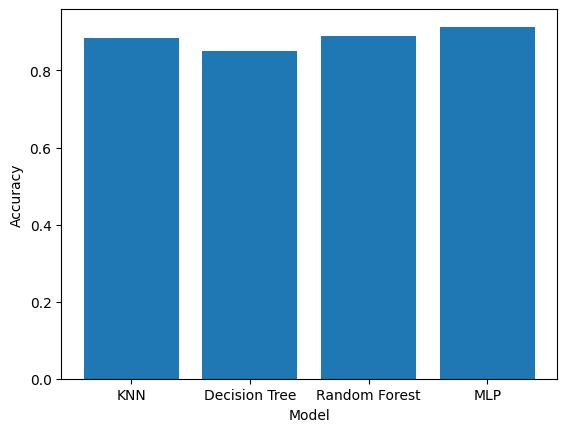

In [ ]:
### START CODE HERE ###
knn_best_params = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**knn_best_params)
knn_best.fit(X_train, y_train)

dtree_best_params = grid_search_dtree.best_params_
dtree_best = DecisionTreeClassifier(**dtree_best_params)
dtree_best.fit(X_train, y_train)

rforest_best_params = grid_search_rforest.best_params_
rforest_best = RandomForestClassifier(**rforest_best_params)
rforest_best.fit(X_train, y_train)

mlp_best_params = grid_search_mlp.best_params_
mlp_best = MLPClassifier(**mlp_best_params)
mlp_best.fit(X_train, y_train)

knn_preds = knn_best.predict(X_test)
dtree_preds = dtree_best.predict(X_test)
rforest_preds = rforest_best.predict(X_test)
mlp_preds = mlp_best.predict(X_test)

knn_acc = accuracy_score(y_test, knn_preds)
dtree_acc = accuracy_score(y_test, dtree_preds)
rforest_acc = accuracy_score(y_test, rforest_preds)
mlp_acc = accuracy_score(y_test, mlp_preds)

accuracies = [knn_acc, dtree_acc, rforest_acc, mlp_acc]
models = ['KNN', 'Decision Tree', 'Random Forest', 'MLP']
plt.bar(models, accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
### END CODE HERE ###

**Plot the confusion matrix for each model's best parameters.**


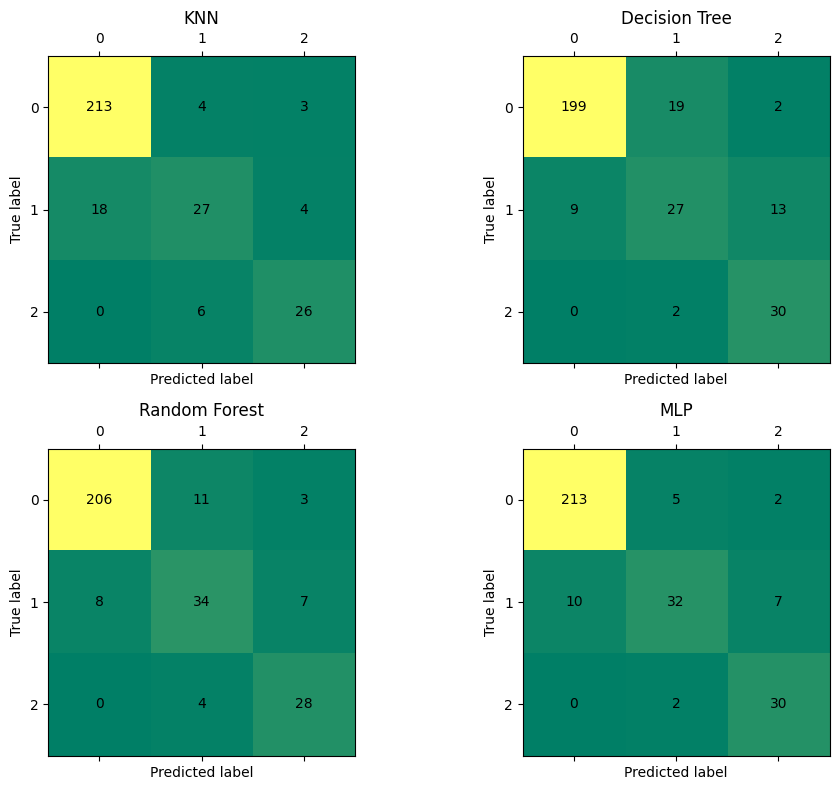

In [ ]:
### START CODE HERE ###
knn_cm = confusion_matrix(y_test, knn_preds)
dtree_cm = confusion_matrix(y_test, dtree_preds)
rforest_cm = confusion_matrix(y_test, rforest_preds)
mlp_cm = confusion_matrix(y_test, mlp_preds)

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].matshow(knn_cm, cmap='summer')
axs[0,0].set_title('KNN')
for (i, j), z in np.ndenumerate(knn_cm):
    axs[0,0].text(j, i, '{}'.format(int(z)), ha='center', va='center')

axs[0,1].matshow(dtree_cm, cmap='summer')
axs[0,1].set_title('Decision Tree')
for (i, j), z in np.ndenumerate(dtree_cm):
    axs[0,1].text(j, i, '{}'.format(int(z)), ha='center', va='center')

axs[1,0].matshow(rforest_cm, cmap='summer')
axs[1,0].set_title('Random Forest')
for (i, j), z in np.ndenumerate(rforest_cm):
    axs[1,0].text(j, i, '{}'.format(int(z)), ha='center', va='center')

axs[1,1].matshow(mlp_cm, cmap='summer')
axs[1,1].set_title('MLP')
for (i, j), z in np.ndenumerate(mlp_cm):
    axs[1,1].text(j, i, '{}'.format(int(z)), ha='center', va='center')

for ax in axs.flat:
    ax.set(xlabel='Predicted label', ylabel='True label')
fig.tight_layout()
plt.show()
### END CODE HERE ###